In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('reviews.csv', encoding='utf-8')

In [21]:
# Group by 'Business_name' and calculate the average rating based on sum and count
df_grouped = df.groupby('Business_name').agg({'Rating': ['sum', 'count']})
df_grouped.columns = ['Sum_Rating', 'Count_Reviews']
df_grouped['Average_Rating'] = df_grouped['Sum_Rating'] / df_grouped['Count_Reviews']
df_grouped = df_grouped.reset_index()

In [22]:
# Sort the DataFrame by average rating and count of reviews in descending order
df_sorted = df_grouped.sort_values(by=['Count_Reviews','Average_Rating'], ascending=False)

In [23]:
# Get the top 10 rated locations
top_10 = df_sorted.head(10)

# Print the top 10 rated locations
print("Top 10 rated locations:")
print(top_10)

# Get the bottom 10 rated locations
bottom_10 = df_sorted.tail(10)

# Print the bottom 10 rated locations
print("Bottom 10 rated locations:")
print(bottom_10)

Top 10 rated locations:
             Business_name  Sum_Rating  Count_Reviews  Average_Rating
64                  Koukos       823.0            169        4.869822
0    ARC Espresso Wine Bar       515.0            113        4.557522
58         JOIN Juice Bars       413.0             88        4.693182
76                   Mikel       333.0             81        4.111111
114           The Blue Cup       332.0             71        4.676056
112              Starbucks       236.0             65        3.630769
113            Sugar Angel       278.0             63        4.412698
123             To Tourlou       279.0             61        4.573770
21         Brusco Meze Bar       237.0             53        4.471698
75          Menta Cafe Bar       238.0             51        4.666667
Bottom 10 rated locations:
                      Business_name  Sum_Rating  Count_Reviews  Average_Rating
6          Anapsyktirio Anthokomiki         4.0              1             4.0
7                    

C:\Users\30698\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


Text(0.98, 0.95, 'Count of Reviews')

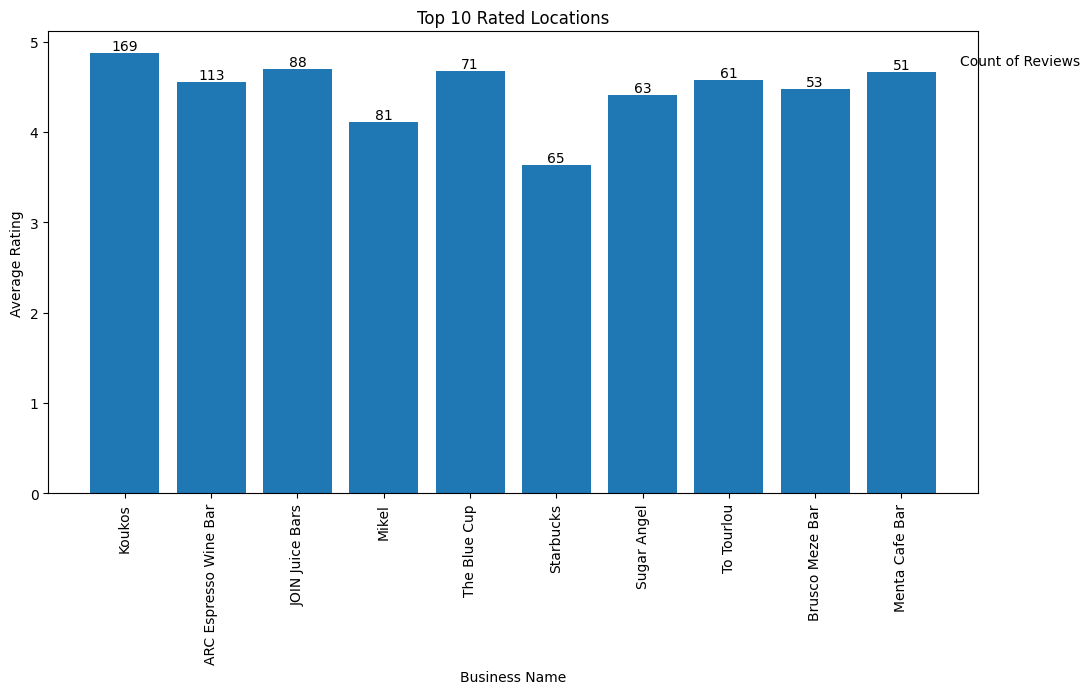

In [40]:

# Create a figure for the top 10 rated locations
fig1, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(top_10['Business_name'], top_10['Average_Rating'])
ax1.set_title('Top 10 Rated Locations')
ax1.set_xlabel('Business Name')
ax1.set_ylabel('Average Rating')
ax1.set_xticklabels(top_10['Business_name'], rotation=90)

# Add the count of reviews as text above each bar
top_counts = top_10['Count_Reviews'].tolist()
for i, bar in enumerate(ax1.patches):
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), top_counts[i],ha='center', va='bottom')
ax1.text(0.98, 0.95, 'Count of Reviews', ha='left', va='top', transform=ax1.transAxes)


C:\Users\30698\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


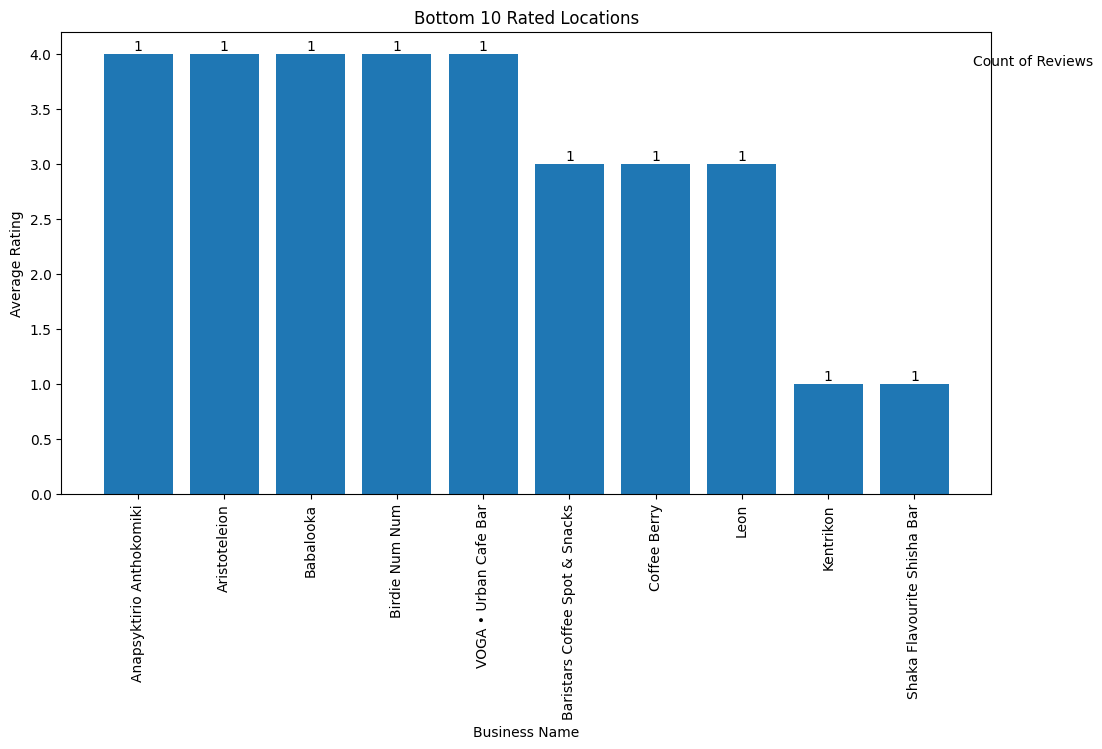

In [41]:
# Create a figure for the bottom 10 rated locations
fig2, ax2 = plt.subplots(figsize=(12, 6))
ax2.bar(bottom_10['Business_name'], bottom_10['Average_Rating'])
ax2.set_title('Bottom 10 Rated Locations')
ax2.set_xlabel('Business Name')
ax2.set_ylabel('Average Rating')
ax2.set_xticklabels(bottom_10['Business_name'], rotation=90)

# Add the count of reviews as text above each bar
bottom_counts = bottom_10['Count_Reviews'].tolist()
for i, bar in enumerate(ax2.patches):
    ax2.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), bottom_counts[i], ha='center', va='bottom')
ax2.text(0.98, 0.95, 'Count of Reviews', ha='left', va='top', transform=ax2.transAxes)

# Display the plots
plt.show()